# Kaggel Titanic: Felaketten Makine Öğrenmesi

Bu proje kaggle'dan alınmış olan veri seti ile yapılmış olan bir makine öğrenmesi projesidir.

Okuyanlara teşekkürlerimi iletiyorum

saygılarımla Alihan AKKUŞ

#Veri Düzenleme

## Veri Yükleme ve Hazırlık

In [1]:
#Google drive Bağlantısı için
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Kütüphanelerin içeri aktarımı

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

##Veri Anlama ve Görselleştirme

###Veri okuma

In [3]:
df_Train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_Regresion/Data/train.csv')
df_Test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic_Regresion/Data/test.csv')

###Bilgi

In [4]:
print(df_Test.head())
print(df_Train.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1 

In [5]:
df_Test.info()
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [6]:
print(df_Test.describe())
print(df_Train.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min      

###Temel İstatistikler

In [7]:
df_train_Gruop=df_Train.select_dtypes(include=['object','category'])
df_test_Gruop=df_Test.select_dtypes(include=['object','category'])
df_train_Number=df_Train.select_dtypes(include=['int64','float64'])
df_test_Number=df_Test.select_dtypes(include=['int64','float64'])

df_train_Gruop[['Survived','Pclass']] = df_train_Number[['Survived','Pclass']]
df_test_Gruop[['Pclass']] = df_test_Number[['Pclass']]

df_train_Number.drop(['Survived','Pclass'],axis=1,inplace=True)
df_test_Number.drop(['Pclass'],axis=1,inplace=True)

df_train_Gruop.drop('Name', axis=1, inplace=True)
df_test_Gruop.drop('Name', axis=1, inplace=True)

In [8]:
print(df_train_Number.describe())
print(df_test_Number.describe())

       PassengerId         Age       SibSp       Parch        Fare
count   891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000   29.699118    0.523008    0.381594   32.204208
std     257.353842   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000   20.125000    0.000000    0.000000    7.910400
50%     446.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000   38.000000    1.000000    0.000000   31.000000
max     891.000000   80.000000    8.000000    6.000000  512.329200
       PassengerId         Age       SibSp       Parch        Fare
count   418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000   30.272590    0.447368    0.392344   35.627188
std     120.810458   14.181209    0.896760    0.981429   55.907576
min     892.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000   21.000000    0.000000    0.000000    7.89

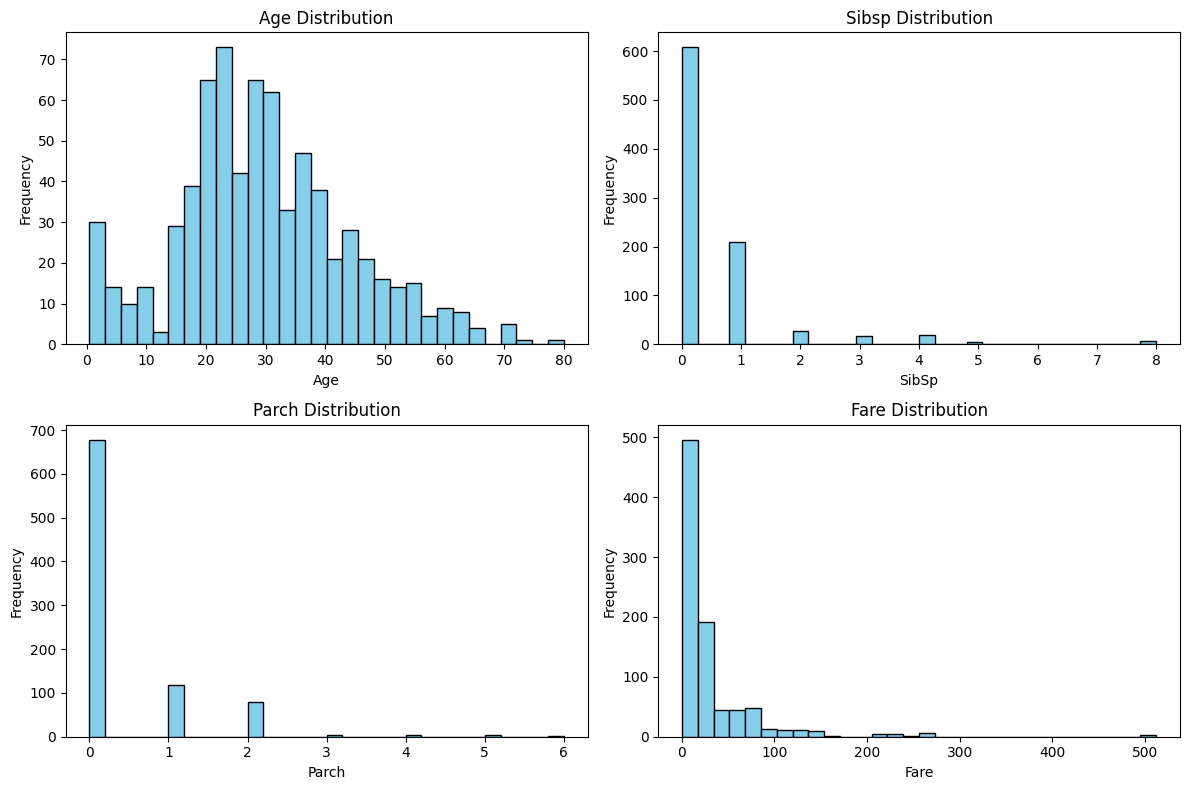

In [9]:
plt.figure(figsize=(12, 8))
cols = [col for col in df_train_Number.columns if col != 'PassengerId']

for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)  # 2x2 grid, i+1. grafiği
    plt.hist(df_train_Number[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
cols = [col for col in df_train_Gruop.columns if col != 'PassengerId']

for col in cols:
    print(f"\n{col.upper()} frekans dağılımı:")
    print(df_train_Gruop[col].value_counts())
    print("\nOranlar (%):")
    print(df_train_Gruop[col].value_counts(normalize=True) * 100)


SEX frekans dağılımı:
Sex
male      577
female    314
Name: count, dtype: int64

Oranlar (%):
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

TICKET frekans dağılımı:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

Oranlar (%):
Ticket
347082              0.785634
1601                0.785634
CA. 2343            0.785634
3101295             0.673401
CA 2144             0.673401
                      ...   
PC 17590            0.112233
17463               0.112233
330877              0.112233
373450              0.112233
STON/O2. 3101282    0.112233
Name: proportion, Length: 681, dtype: float64

CABIN frekans dağılımı:
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
            

In [11]:
print(df_train_Gruop.groupby('Sex')['Survived'].mean())
print(df_train_Gruop.groupby('Pclass')['Survived'].mean())
print(df_train_Gruop.groupby('Embarked')['Survived'].mean())


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


##Veri Hazırlama

### Boş değerli silme veya doldurma işlemleri

In [12]:
df_train_last = pd.concat([df_train_Number,df_train_Gruop], axis=1)
df_test_last = pd.concat([df_test_Number,df_test_Gruop], axis=1)

In [13]:
# Ilk Null kontrolü
print(df_train_last.isnull().sum())
print(df_test_last.isnull().sum())

PassengerId      0
Age            177
SibSp            0
Parch            0
Fare             0
Sex              0
Ticket           0
Cabin          687
Embarked         2
Survived         0
Pclass           0
dtype: int64
PassengerId      0
Age             86
SibSp            0
Parch            0
Fare             1
Sex              0
Ticket           0
Cabin          327
Embarked         0
Pclass           0
dtype: int64


In [14]:
# modele çok etkisi olmayan değerleri veriden atıyoruz
df_train_last.dropna(subset=['Embarked'], inplace=True)
df_test_last.dropna(subset=['Fare'], inplace=True)

# Eksik yaş değerlerini gruplama yaparak median değerleri ile doldurma
df_train_last['Age'] = df_train_last.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df_test_last['Age'] = df_test_last.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Cabin sutünunu n değerlerini büyük N ile değiştirme
df_train_last['Cabin'] = df_train_last['Cabin'].astype(str).str[0].replace('n', 'N')
df_test_last['Cabin'] = df_test_last['Cabin'].astype(str).str[0].replace('n', 'N')

In [15]:
# Son Null kontrolü
print(df_train_last.isnull().sum())
print(df_test_last.isnull().sum())

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
Survived       0
Pclass         0
dtype: int64
PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
Pclass         0
dtype: int64


In [16]:
#Bu rada tahmin ettikten sonra hangi yolcunun hayatta kaldığını öğrenmek için PassengerId derğelerini alıyoruz ve
# eğitimin sonda kaggle verdiği test verisi ile tahmin ettirdikten sonra bu bilgi birleştime işlemi yapacağız
passenger_ids = df_test_last['PassengerId']

### Özellik Gruplama & Dönüştürme

In [17]:
Aralık = [0, 12, 18, 25, 35, 45, 55, 65, 100]
Etiketler = ['0-12', '13-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
# Yaşı gruplama
df_train_last['Age_group'] = pd.cut(df_train_last['Age'], bins=Aralık, labels=Etiketler, right=False)
df_test_last['Age_group'] = pd.cut(df_test_last['Age'], bins=Aralık, labels=Etiketler, right=False)

# Sex için Label Encoding
sex_encoder = LabelEncoder()
df_train_last['Sex'] = sex_encoder.fit_transform(df_train_last['Sex'])
df_test_last['Sex'] = sex_encoder.transform(df_test_last['Sex'])

#One-Hot Encoding
df_train_last = pd.get_dummies(df_train_last, columns=['Embarked'], drop_first=True)
df_test_last = pd.get_dummies(df_test_last, columns=['Embarked'], drop_first=True)

df_train_last = pd.get_dummies(df_train_last, columns=['Cabin'], drop_first=True)
df_test_last = pd.get_dummies(df_test_last, columns=['Cabin'], drop_first=True)

df_train_last = pd.get_dummies(df_train_last, columns=['Age_group'], drop_first=True)
df_test_last = pd.get_dummies(df_test_last, columns=['Age_group'], drop_first=True)

df_train_last.drop(['Ticket','PassengerId','Age'], axis=1, inplace=True)
df_test_last.drop(['Ticket','PassengerId','Age'], axis=1, inplace=True)

print(df_train_last.head())
print(df_test_last.head())

   SibSp  Parch     Fare  Sex  Survived  Pclass  Embarked_Q  Embarked_S  \
0      1      0   7.2500    1         0       3       False        True   
1      1      0  71.2833    0         1       1       False       False   
2      0      0   7.9250    0         1       3       False        True   
3      1      0  53.1000    0         1       1       False        True   
4      0      0   8.0500    1         0       3       False        True   

   Cabin_B  Cabin_C  ...  Cabin_G  Cabin_N  Cabin_T  Age_group_13-18  \
0    False    False  ...    False     True    False            False   
1    False     True  ...    False    False    False            False   
2    False    False  ...    False     True    False            False   
3    False     True  ...    False    False    False            False   
4    False    False  ...    False     True    False            False   

   Age_group_19-25  Age_group_26-35  Age_group_36-45  Age_group_46-55  \
0             True            False        

## Train ve Validation gruplarına ayrıma

In [18]:
X=df_train_last.drop(['Survived','Cabin_T'],axis=1)
Y=df_train_last['Survived']

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X, Y,
    test_size=0.2,     #%80 train, %20 validation
    random_state=42,
    stratify=Y
)

print("Train set boyutu:", X_tr.shape)
print("Validation set boyutu:", X_val.shape)


Train set boyutu: (711, 21)
Validation set boyutu: (178, 21)


#Model

###Random forset

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Eğit
rf_model.fit(X_tr ,y_tr)

# Tahmin
y_pred_rf = rf_model.predict(X_val)

# Sonuçları değerlendir
print("🎯 Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))


🎯 Random Forest Accuracy: 0.7640449438202247
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       110
           1       0.69      0.69      0.69        68

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [20]:
rf_model2 = RandomForestClassifier(n_estimators=70, max_depth=7, random_state=32)
rf_model2.fit(X_tr ,y_tr)

# Tahmin
y_pred_rf2 = rf_model2.predict(X_val)

# Sonuçları değerlendir
print("🎯 Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf2))
print(classification_report(y_val, y_pred_rf2))

🎯 Random Forest Accuracy: 0.7921348314606742
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.76      0.66      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



###Xgboost

In [21]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=16, eval_metric='mlogloss')

# Modeli eğitiyoruz
xgb_model.fit(X_tr,y_tr)

# tahmin yapıyoruz
y_pred_xgb = xgb_model.predict(X_val)

# Sonuçları değerlendiriyoruz
print("🎯 XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))


🎯 XGBoost Accuracy: 0.7808988764044944
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.69        68

    accuracy                           0.78       178
   macro avg       0.77      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



##GridSearch

In [22]:
# Random Forest için parametre  gridini oluştur
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# XGBoost için parametre gridini oluştur
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Random Forest modelini tanımla
rf_model = RandomForestClassifier(random_state=42)

# XGBoost modelini tanımla
xgb_model = xgb.XGBClassifier(random_state=42)

# Random Forest için GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_tr, y_tr)

# XGBoost için GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_tr, y_tr)

# En iyi parametreler
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1}


In [23]:
# En iyi modellerin değerlendirmeleri
rf_best_model = rf_grid_search.best_estimator_
xgb_best_model = xgb_grid_search.best_estimator_

# Tahmin
y_pred_rf = rf_best_model.predict(X_val)
y_pred_xgb = xgb_best_model.predict(X_val)

# Sonuçları değerlendir
print("🎯 Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("🎯 XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))

print("🎯 Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("🎯 XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))

🎯 Random Forest Accuracy: 0.797752808988764
🎯 XGBoost Accuracy: 0.7752808988764045
🎯 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        68

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.79       178

🎯 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.60      0.67        68

    accuracy                           0.78       178
   macro avg       0.77      0.74      0.75       178
weighted avg       0.77      0.78      0.77       178



# Kaggle Yükleme Hazırlıkları

 Bu bölümde Yaptığım bu modeli kaggl verdiği test verileri ile tahmin ettirip bunları bir csv dosyasına aktarma işlemleri dir.

In [24]:
y_pred_rf_orj =rf_best_model.predict(df_test_last)

submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred_rf_orj
})

# CSV olarak kaydet
submission.to_csv('submission.csv', index=False)


# Sonuç

Bu çalışmada sınıflandırma problemi üzerinde Random Forest ve XGBoost algoritmaları uygulanmış, modellerin hem varsayılan hem de hiperparametre optimizasyonu (GridSearchCV) sonrası performansları analiz edilmiştir.

## Varsayılan Model Performansları
Random Forest: %79.21 doğruluk oranı ile başlangıçta güçlü bir performans sergilemiştir. Sınıf 0 için precision %81, recall %87 ve f1-score %84 iken, sınıf 1 için bu değerler %76, %66 ve %71 olarak gözlemlenmiştir.

XGBoost: %78.09 doğruluk ile Random Forest’a yakın bir performans göstermiştir. Sınıf 0’da precision %80, recall %86, f1-score %83; sınıf 1’de ise precision %75, recall %65 ve f1-score %69 olarak elde edilmiştir.

Her iki model de sınıf 0 için yüksek başarı göstermiş ancak sınıf 1’lerde özellikle recall skorlarında düşüş gözlemlenmiştir. Bu, sınıflar arası dengesizlik veya sınıf 1’in daha zor ayırt edilebilmesi ile açıklanabilir.

##GridSearchCV Sonrası İyileştirilmiş Performanslar
Hiperparametre optimizasyonu sonrasında her iki modelde de sınırlı ama anlamlı performans artışları elde edilmiştir.

Random Forest (GridSearch sonrası) doğruluğunu %79.77’ye yükseltmiş ve sınıf 1 için recall değerini %68’e çıkarmıştır. F1-score da %72’ye yükselmiştir. Bu, modelin sınıf 1’i tanıma konusundaki başarısının arttığını göstermektedir.

XGBoost (GridSearch sonrası) doğruluğu %77.53 olarak gerçekleşmiştir. Ancak sınıf 1 için recall değeri %60 ile düşük kalmıştır. F1-score da %67 ile Random Forest’ın gerisindedir. Bu durum, XGBoost’un optimizasyon sonrası sınıf 1’lerde Random Forest’a kıyasla daha düşük başarı sergilediğini göstermektedir.

##Genel Değerlendirme
GridSearch sonrası elde edilen sonuçlar, Random Forest modelinin genel olarak daha istikrarlı ve dengeli performans sergilediğini ortaya koymaktadır. XGBoost modeli sınıf 0 için yüksek doğruluk sunsa da, sınıf 1’i tanıma performansı Random Forest’a kıyasla daha zayıf kalmıştır.

Sonuç olarak, bu sınıflandırma probleminde Random Forest algoritması, özellikle sınıf dengesizliğinin etkili olduğu durumlarda, XGBoost’a göre daha uygun bir seçenek olarak öne çıkmaktadır. Model başarısını daha da artırmak için ileri düzey özellik mühendisliği, sınıf dengesini iyileştirici yöntemler (örneğin SMOTE, Class Weight ayarı) ve model toplulukları (ensemble) gibi yaklaşımlar gelecekteki çalışmalar için önerilmektedir.